In [ ]:
# IPCC mentions: add words
# Heatmap: sort y values

In [9]:
import pandas as pd
import numpy as np
from countrygroups import G20
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 
import matplotlib.pyplot as plt 

In [10]:
link = r'/Users/jiaminlim/Documents/Research/climate_nlp/global-stocktake-documents/df_countrysubmissions.csv'
df_countrysubmissions = pd.read_csv(link)

/var/folders/tj/w37gcb090bj93v3xpklf678r0000gn/T/ipykernel_49606/3525747718.py:2: DtypeWarning: Columns (8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_countrysubmissions = pd.read_csv(link)


In [82]:
# Python program for the above approach
import re
 
# Function to count total occurrences of word "w" in String "str"
def countOccurrences(string, w):
    string = str(string)
    # Get the regex to be checked
    regexPattern = "\\b" + w + "\\b"
     
    # Variable to count total occurrences of the given word
    count = 0
     
    for m in re.finditer(regexPattern, string, re.IGNORECASE):
        # Increment count
        count += 1
         
    # Print the occurrences of the word
    #print(count)
    return count
     
# Driver Code
 
# Input
text = "peter pecker pickled a pick! of PICK PICKled peppers"
w = "peter Pecker"
print(countOccurrences(text,w))

1


In [100]:
df_countrysubmissions['regex_n_ipcc_full'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"Intergovernmental Panel on Climate Change"))
df_countrysubmissions['regex_n_ipcc'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"ipcc"))
df_countrysubmissions['regex_n_ipcc_all'] = df_countrysubmissions['regex_n_ipcc_full'] + df_countrysubmissions['regex_n_ipcc']
df_countrysubmissions['regex_n_ipcc'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"ipcc"))
df_countrysubmissions['regex_n_ar5'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"AR5"))
df_countrysubmissions['regex_n_ar6'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"AR6"))
df_countrysubmissions['regex_n_2006ipcc'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"2006 IPCC"))
df_countrysubmissions['regex_n_2006ipccguidelines'] = df_countrysubmissions['text'].apply(lambda x: countOccurrences(x,"2006 IPCC Guidelines"))

In [85]:
df_countrysubmissions['n_ar5'] = df_countrysubmissions.text.str.count('AR5|ar5')
df_countrysubmissions['n_ar6'] = df_countrysubmissions.text.str.count('AR6|ar6')
df_countrysubmissions['n_ipcc'] = df_countrysubmissions.text.str.count('IPCC|ipcc')
df_countrysubmissions['n_ipcc_upper'] = df_countrysubmissions.text.str.count('IPCC')
df_countrysubmissions['n_2006ipcc'] = df_countrysubmissions.text.str.count('2006 IPCC')
df_countrysubmissions['n_2006ipccguidelines'] = df_countrysubmissions.text.str.count('2006 IPCC Guidelines')

In [114]:
# Checks 
df_countrysubmissions['check_n_IPCC'] = df_countrysubmissions['regex_n_IPCC'] == df_countrysubmissions['n_ipcc']
pd.set_option('max_colwidth', 10000)

#print(df_countrysubmissions['check_n_IPCC'].value_counts())
#print(len(df_countrysubmissions[df_countrysubmissions['n_ipcc_upper']>0]))
#print(len(df_countrysubmissions[df_countrysubmissions['n_ipcc']>0]))
#print(len(df_countrysubmissions[df_countrysubmissions['regex_n_IPCC']>0]))

In [67]:
g20_list = G20

In [110]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_year = df_countrysubmissions[df_countrysubmissions['year']>2006].groupby(['year']).agg(n_ipcc = ('n_ipcc','sum'),
                                                                                          regex_n_ipcc = ('regex_n_ipcc','sum'),
                                                                                          regex_n_ipcc_all = ('regex_n_ipcc_all','sum'),
                                                                                          n_ar5 = ('n_ar5','sum'),
                                                                                          regex_n_ar5= ('regex_n_ar5','sum'),
                                                                                          n_ar6 = ('n_ar6','sum'),
                                                                                          regex_n_ar6= ('regex_n_ar6','sum'),
                                                                                          n_2006ipcc = ('n_2006ipcc','sum'),
                                                                                          regex_n_2006ipcc= ('regex_n_2006ipcc','sum'),
                                                                                          n_2006ipccg = ('n_2006ipccguidelines','sum'),
                                                                                          regex_n_2006ipccg= ('regex_n_2006ipccguidelines','sum'),
                                                                                          n_words=('n_words','sum'))
by_year['%_ipcc'] = by_year['regex_n_ipcc']/by_year['n_words']*100.0
#by_year = by_year.drop('n_ipcc', axis=1)
#by_year = by_year.drop('n_words', axis=1)

#by_year.sort_values(['year'],ascending=False).plot()
#.plot(style='.-',legend=False,ylabel='Share of total words (%)',ylim=(0,0.16))
by_year = by_year.reset_index()

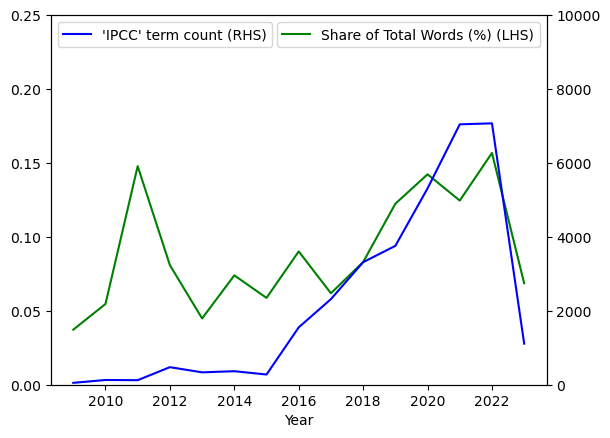

In [111]:
# Creating dataset 
x = by_year['year']
dataset_0 =  by_year['%_ipcc']
dataset_1a =  by_year['regex_n_ipcc']
dataset_2 = by_year['n_words'] 
 
# Creating plot with dataset_1
fig, ax1 = plt.subplots() 
 
ax1.set_xlabel('Year') 
#ax1.set_ylabel('IPCC term counts') 
ax1.plot(x, dataset_0, 'g', label ='Share of Total Words (%) (LHS)') 
ax1.set_ylim([0, 0.25])
ax1.tick_params(axis ='y') 
plt.legend()

# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
 
#ax2.set_ylabel('Total Words') 
ax2.plot(x, dataset_1a, color = 'b', label ='\'IPCC\' term count (RHS)') 
ax2.set_ylim([0, 10000])
ax2.tick_params(axis ='y') 
 
# Adding title
#plt.title('Country Policy Reports - IPCC counts and Total Words', fontweight ="bold") 
plt.legend(loc='upper left')

# Show plot
plt.show()

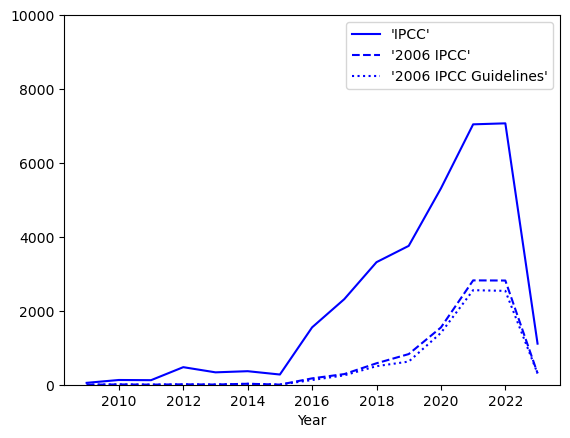

In [108]:
# Creating dataset 
x = by_year['year']
dataset_1a =  by_year['regex_n_ipcc']
dataset_1b =  by_year['regex_n_2006ipcc']
dataset_1c =  by_year['regex_n_2006ipccg']
 
# Creating plot with dataset_1
fig, ax1 = plt.subplots() 
 
ax1.set_xlabel('Year') 
#ax1.set_ylabel('IPCC term counts') 
ax1.plot(x, dataset_1a, 'b', label ='\'IPCC\'') 
ax1.plot(x, dataset_1b, 'b', linestyle='dashed', label ='\'2006 IPCC\'') 
ax1.plot(x, dataset_1c, 'b', linestyle='dotted', label ='\'2006 IPCC Guidelines\'') 

ax1.set_ylim([0, 10000])
ax1.tick_params(axis ='y') 
plt.legend()

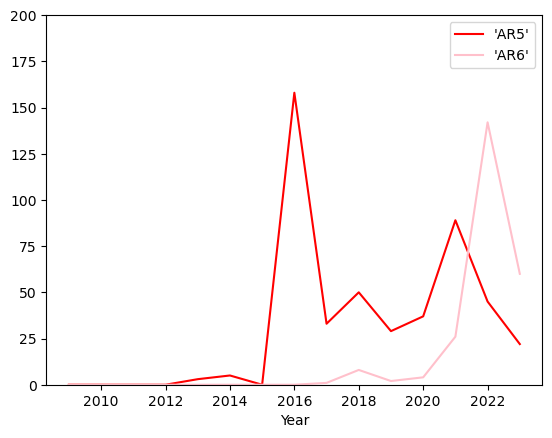

In [190]:
# Creating dataset 
x = by_year['year']
dataset_1a =  by_year['regex_n_ar5']
dataset_1b =  by_year['regex_n_ar6']


# Creating plot with dataset_1
fig, ax1 = plt.subplots() 
 
ax1.set_xlabel('Year') 
#ax1.set_ylabel('IPCC term counts') 
ax1.plot(x, dataset_1a, 'r', label ='\'AR5\'') 
ax1.plot(x, dataset_1b, 'pink', label ='\'AR6\'') 


ax1.set_ylim([0, 200])
ax1.tick_params(axis ='y') 
plt.legend()

In [115]:
pd.set_option('max_colwidth', 10000)

df_countrysubmissions[(df_countrysubmissions['n_ar6']>0) & (df_countrysubmissions['year']== 2014)]['text']

21441                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Key parameters for policy and measures GHG benefits methodology documentation for CAR6 Chapter 4
21474                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [138]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_country = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso']).agg(regex_n_ipcc = ('regex_n_ipcc','sum'), n_words=('n_words','sum'))
by_country['%_ipcc'] = by_country['regex_n_ipcc']/by_country['n_words']*100.0
#by_country = by_country.drop('regex_n_ipcc', axis=1)
by_country = by_country.drop('n_words', axis=1)
by_country = by_country.reset_index()

#by_country.plot(kind='barh',legend=False,xlabel='Share of total words (%)',ylabel='G20 Country')

Index(['geography_iso', 'regex_n_ipcc', '%_ipcc'], dtype='object')

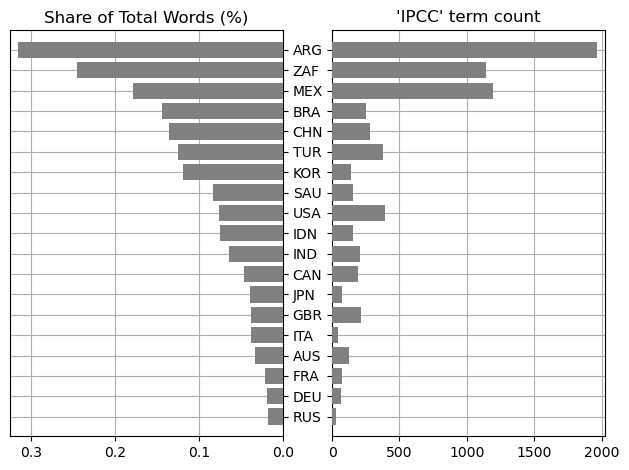

In [189]:
y0 = by_country['geography_iso']
x1 =  by_country['%_ipcc']
x2 =  by_country['regex_n_ipcc']

# Sort by number of sales staff
idx = x1.argsort()
y0, x1, x2 = [np.take(x, idx) for x in [y0, x1, x2]]

y = np.arange(x1.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray', zorder=10)
axes[0].set(title='Share of Total Words (%)')
axes[1].barh(y, x2, align='center', color='gray', zorder=10)
axes[1].set(title='\'IPCC\' term count')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=y0)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.18)
plt.show()

In [166]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_report = df_countrysubmissions.groupby(['types0']).agg(regex_n_ipcc = ('regex_n_ipcc','sum'), n_words=('n_words','sum'))
by_report['%_ipcc'] = by_report['regex_n_ipcc']/by_report['n_words']*100.0
# by_report = by_report.drop('regex_n_ipcc', axis=1)
by_report = by_report.drop('n_words', axis=1)
by_report = by_report.reset_index()

# by_report.sort_values(['%_ipcc'],ascending=True).plot(kind='barh',legend=False,xlabel='Share of total words (%)',ylabel='Document Type')

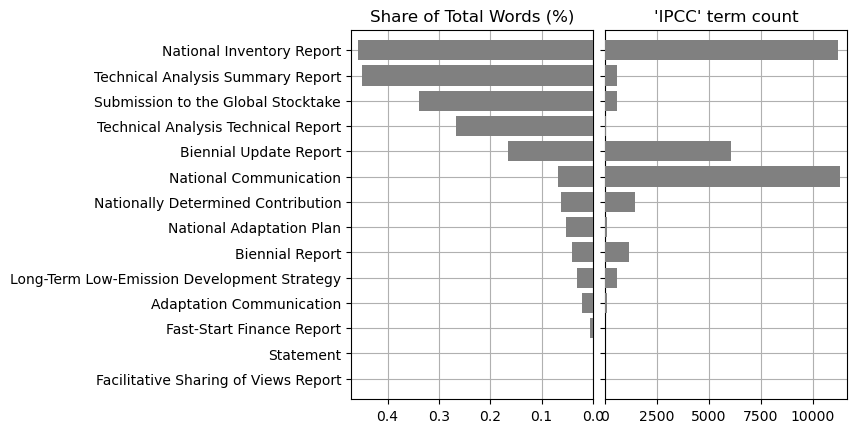

In [185]:
y0 = by_report['types0']
x1 =  by_report['%_ipcc']
x2 =  by_report['regex_n_ipcc']

# Sort by number of sales staff
idx = x1.argsort()
y0, x1, x2 = [np.take(x, idx) for x in [y0, x1, x2]]

y = np.arange(x1.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, x1, align='center', color='gray', zorder=10)
axes[0].set(title='Share of Total Words (%)')
axes[1].barh(y, x2, align='center', color='gray', zorder=10)
axes[1].set(title='\'IPCC\' term count')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=y0)
#axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

#fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.show()

In [ ]:
# Create dataframe - document type & country - heatmap

In [ ]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso_name','types0']).agg(n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype['%_ipcc'] = by_countrytype['n_ipcc']/by_countrytype['n_words']*100.0
by_countrytype = by_countrytype.drop('n_ipcc', axis=1)
by_countrytype = by_countrytype.drop('n_words', axis=1)

df_by_countrytype = pd.DataFrame(by_countrytype)
df_by_countrytype = df_by_countrytype.reset_index()
df_by_countrytype = df_by_countrytype.pivot(index='geography_iso_name', columns='types0', values='%_ipcc')
#df_by_countrytype = df_by_countrytype.fillna(-1)

#df_by_countrytype.index = pd.CategoricalIndex(df_by_countrytype.index, categories= ["orange", "toffee", "chocolate", "malteser", "raisin", "coffee"])
df_by_countrytype.sort_index(level=0, inplace=True)
df_by_countrytype

plt.figure(figsize=(10,10))
sns.heatmap(df_by_countrytype,annot=True,mask=df_by_countrytype.isna()) 

In [ ]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso_name','types0_agg']).agg(n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype['%_ipcc'] = by_countrytype['n_ipcc']/by_countrytype['n_words']*100.0
by_countrytype = by_countrytype.drop('n_ipcc', axis=1)
by_countrytype = by_countrytype.drop('n_words', axis=1)

df_by_countrytype = pd.DataFrame(by_countrytype)
df_by_countrytype = df_by_countrytype.reset_index()
df_by_countrytype = df_by_countrytype.pivot(index='geography_iso_name', columns='types0_agg', values='%_ipcc')
df_by_countrytype 
#df_by_countrytype = df_by_countrytype.fillna(-1)

#df_by_countrytype.index = pd.CategoricalIndex(df_by_countrytype.index, categories= ["orange", "toffee", "chocolate", "malteser", "raisin", "coffee"])
df_by_countrytype.sort_index(level=0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(df_by_countrytype,annot=True,mask=df_by_countrytype.isna()) # Your code here

In [ ]:
#by_year = df_countrysubmissions.groupby(['year']).agg(n_ar5 = ('n_ar5','sum'), n_ar6 = ('n_ar6','sum'), n_ipcc = ('n_ipcc','sum'), n_words=('n_words','sum'))
by_countrytype = df_countrysubmissions[df_countrysubmissions['geography_iso'].isin(G20)].groupby(['geography_iso_name','types0']).agg(n_docs = ('document_name','nunique'))

df_by_countrytype = pd.DataFrame(by_countrytype)
df_by_countrytype = df_by_countrytype.reset_index()
df_by_countrytype = df_by_countrytype.pivot(index='geography_iso_name', columns='types0', values='n_docs')
#df_by_countrytype = df_by_countrytype.fillna(-1)

#df_by_countrytype.index = pd.CategoricalIndex(df_by_countrytype.index, categories= ["orange", "toffee", "chocolate", "malteser", "raisin", "coffee"])
df_by_countrytype.sort_index(level=0, inplace=True)
df_by_countrytype

plt.figure(figsize=(10,10))
plt.title('Number of Documents')
sns.heatmap(df_by_countrytype,annot=True,mask=df_by_countrytype.isna()) 
plt.ylabel('G20 Country') 
plt.xlabel('Document Type') 